In [1]:
import numpy as np
import pandas as pd

In [3]:
# 读取鸢尾花数据集，header参数用来指定标题的行，默认为0，若没有标题，则使用None
# 第一行：id,花萼长度，花萼宽度，花瓣长度，花瓣宽度 cm, 鸢尾花的种类
data = pd.read_csv(r"iris.arff.csv", header = 0)
# 删除不需要的列
data.drop("class", axis=1, inplace=True)
# 删除重复的数据
data.drop_duplicates(inplace=True)

In [30]:
class KNN:
    ''' 用KNN实现回归
    根据前三个特征属性，寻找最近的K个邻居，然后根据k个邻居的第四个特征
    去预测当前样本的第四个特征值
    '''
    def __init__(self, k):
        '''
        初始化方法
        parameters
        ---------
        k: int 邻居的个数
        '''
        self.k = k
    def fit(self, X, y):
        """训练方法
        parameters
        --------
        X: 类数组类型, shape：[样本数量，特征数量]
        待训练的样本特征
        y: 类数组类型，shape：样本数量
        每个样本的目标值（标签）
        """
        # 将X转化为ndarray数组类型
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self, X):
        """根据参数传递的样本，对样本数据进行预测
        parameters
        --------
        X: 类数组类型, shape：[样本数量，特征数量]
        待训练的样本特征
        Returns
        -----------
        result: 数组类型
        预测的结果
        """
        X = np.asarray(X)
        result = []
        # 对X进行遍历，每次取一行
        for x in X:
            # 对测试集中的每个样本，对训练集中所有样本的距离
            dis = np.sqrt(np.sum((x - self.X)**2, axis=1))
            # 对距离进行排序，排序后的值在原始数组（排序前）中的索引
            index = dis.argsort()
            # 进行截断，取k个元素（取k个最近元素的索引）
            index = index[:self.k]
            # 计算均值返回到结果列标
            result.append(np.mean(self.y[index]))
        return np.asarray(result)

    # 考虑权重
    def predict2(self, X):
        """根据参数传递的样本，对样本数据进行预测
        权重的计算方式：使用每个（邻居）节点距离的倒数/所有节点距离倒数之和
        parameters
        --------
        X: 类数组类型, shape：[样本数量，特征数量]
        待训练的样本特征
        Returns
        -----------
        result: 数组类型
        预测的结果
        """
        X = np.asarray(X)
        result = []
        # 对X进行遍历，每次取一行
        for x in X:
            # 对测试集中的每个样本，对训练集中所有样本的距离
            dis = np.sqrt(np.sum((x - self.X)**2, axis=1))
            # 对距离进行排序，排序后的值在原始数组（排序前）中的索引
            index = dis.argsort()
            # 进行截断，取k个元素（取k个最近元素的索引）
            index = index[:self.k]
            # 计算均值返回到结果列标
            # 所有邻居节点距离的倒数之和, 为了避免除数为0的情况，加上一个很小的数     
            s = np.sum(1/(dis[index]+0.001))
            weight = (1/(dis[index]+0.001))/s
            # 用邻居节点的标签值*权重再相加
            result.append(np.sum(self.y[index]*weight))
        return np.asarray(result)

In [34]:
# 洗牌，随机种子指定后，洗牌后随机性一定
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:120, :-1]
train_y = t.iloc[:120, -1]
test_X = t.iloc[120:, :-1]
test_y = t.iloc[120:, -1]
knn = KNN(k=3)
knn.fit(train_X, train_y)
result = knn.predict(test_X)
display(result)
# 计算误差
display(np.mean((result-test_y)**2))
display(test_y.values)

array([1.33333333, 2.        , 1.2       , 1.26666667, 1.93333333,
       1.16666667, 2.16666667, 0.36666667, 1.9       , 1.4       ,
       1.2       , 0.16666667, 1.93333333, 2.26666667, 1.73333333,
       0.13333333, 1.03333333, 1.3       , 1.83333333, 1.23333333,
       0.16666667, 0.23333333, 0.16666667, 2.03333333, 1.2       ,
       1.8       , 0.2       ])

0.04185185185185184

array([1.5, 1.8, 1. , 1.3, 2.1, 1.2, 2.2, 0.2, 2.3, 1.3, 1. , 0.2, 1.6,
       2.1, 2.3, 0.3, 1. , 1.2, 1.5, 1.3, 0.2, 0.4, 0.1, 2.1, 1.1, 1.5,
       0.2])

In [36]:
result = knn.predict2(test_X)
# 计算误差
display(np.mean((result-test_y)**2))

0.0458106555834361

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = 'SimHei' # 默认mpl不支持中文，设置一下支持 
mpl.rcParams["axes.unicode_minus"] = False # 设置中文字体是可以正常显示负号

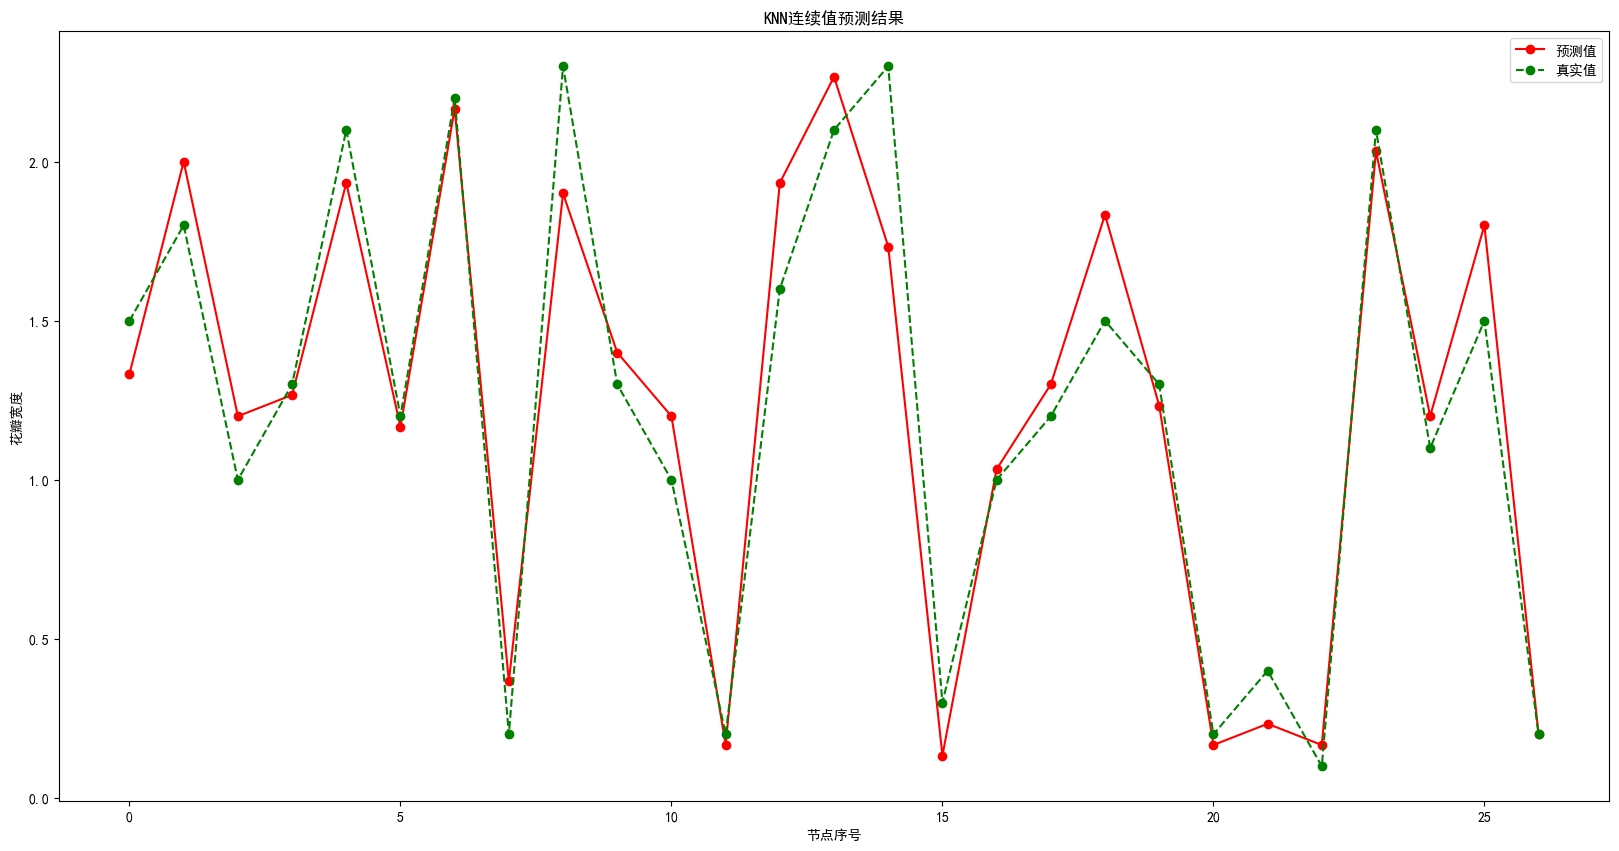

In [15]:
plt.figure(figsize=(20,10))
plt.plot(result, "ro-", label="预测值")
plt.plot(test_y.values, "go--", label="真实值")
plt.xlabel('节点序号')
plt.ylabel('花瓣宽度')
plt.title('KNN连续值预测结果')
plt.legend(loc='best')
plt.show()